<a href="https://colab.research.google.com/github/erica-mccormick/tutorials/blob/main/WaterPyk_Tutorial_Choose_Your_Own_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to change the ```layers``` argument to extract data of your choice using WaterPyk

### Imports and initializing

In [1]:
pip install geopandas -q

In [2]:
pip install rasterio -q

In [3]:
import ee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import rasterio as rio

ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=nOSCcBlZr-p_GY2xBCJusZafhME6SSa_TOjSzD4cUkA&tc=BtebI4xJWNsNtOQpMe7iXj5-7xpIJkCxEbPQDcu5WkY&cc=OcWKvoz1tvy-wvl_pMVr0jLvpguk3ZJm9RDO6Y82wCw

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfgeXvvWMzn4Cr2FOJIQ5P8tmDbgiuzJoiETBk3fR_B_tZQ6jcxBl_Y-h3c

Successfully saved authorization token.


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [4]:
pip install waterpyk -q

If you are still getting an error, make sure you are using at least version 2.3.0 (I just updated it!)

But note that eventually it might get updated again, so don't always specify this version indefinitely in the future!

In [11]:
#pip install waterpyk==2.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 1.3 MB/s 
  Attempting uninstall: waterpyk
    Found existing installation: waterpyk 2.2.0
    Uninstalling waterpyk-2.2.0:
      Successfully uninstalled waterpyk-2.2.0


In [58]:
from waterpyk.main import StudyArea
import waterpyk

### Initialize a StudyArea object with the default ```layers = 'all'```

In [71]:
rivendell = StudyArea(layers = 'all', coords = [39.7273, -123.6433])

Getting layers from load_data()...
Extracting prism
	Original timestep of 1 day(s) was interpolated to daily.
Extracting pml
	Original timestep of 8 day(s) was interpolated to daily.
	Es, Ec, Ei bands were scaled by 0.01
Extracting modis_snow
	Bands NDSI_Snow_Cover renamed to snow.
	Original timestep of 1 day(s) was interpolated to daily.
Extracting modis_ET
	Original timestep of 8 day(s) was interpolated to daily.
	ET, PET bands were scaled by 0.08
Extracting modis_landcover
	Bands LC_Type1 renamed to landcover.
Extracting srtm_elevation

Saving all dataframes at:
	/content/drive/MyDrive/39.7273_-123.6433

Time to access data: 17.145 seconds


### WaterPyk comes with 2 "preset" csvs of assets to extract. We can specify these with the layers = 'all' and layers = 'minimal'. We can see the 'all' csv (imported automatically as a pandas df) by accessing the ```extracted_df``` attribute of our rivendell object.

In [72]:
rivendell.extracted_df

,name,asset_id,scale,start_date,end_date,relative_date,bands,new_bandnames,bands_to_scale,scaling_factor,units
0,prism,OREGONSTATE/PRISM/AN81d,500,10/1/03,10/1/2020,NaN,ppt,NaN,NaN,NaN,mm
1,pml,projects/pml_evapotranspiration/PML/OUTPUT/PML...,500,10/1/03,10/1/2020,NaN,"Es, Ec, Ei",NaN,"Es, Ec, Ei",0.01,mm
2,modis_snow,MODIS/006/MOD10A1,500,10/1/03,10/1/2020,NaN,NDSI_Snow_Cover,snow,NaN,NaN,mm
3,modis_ET,MODIS/006/MOD16A2,500,10/1/03,10/1/2020,NaN,"ET, PET",NaN,"ET, PET",0.08,mm
4,modis_landcover,MODIS/006/MCD12Q1,500,NaN,NaN,most_recent,LC_Type1,landcover,NaN,NaN,NaN
5,srtm_elevation,USGS/SRTMGL1_003,30,NaN,NaN,image,elevation,NaN,NaN,NaN,m


### **Option 1** Modify extracted_df

### We can save extracted_df to a variable and then modify it to extract the ingredients for the deficit from 2003 to 2010 instead of to 2020. We'll also keep the non-timeseries variables landcover and elevation.

### Some other thoughts:

* We can't extract the deficit past 2020 because the ET asset (PML) does not extend further than that at this time. See below for how to get individual assets without trying to calculate the deficit.

* The majority of waterpyk.StudyArea() relies on storing all of the variables in one dataframe (for example in the format of ```daily_df_wide```. This means that all of the timeseries will be truncated to match the variable with the shortest time range.

* If you want to extract variables of mismatched time ranges, you could do them one by one, like I'm showing here. You could also use waterpyk's other functions, like those in the [waterpyk.gee module](https://waterpyk.readthedocs.io/en/latest/waterpyk.html#module-waterpyk.gee). You could also use your own code, or code taken from waterpk's source code! 

* The stuff that StudyArea does is all taken care of by functions in waterpyk's other modules, like ```gee```, ```calcs``` and ```plots```. In fact, waterpyk does lots of other stuff that StudyArea doesn't do! So feel free to explore and let me know when you run into errors.

In [79]:
extract_v1 = rivendell.extracted_df.copy() ### the .copy() makes sure we don't change the actual extracted_df attribute ... which I should have prevented in the code ;)
extract_v1['end_date'][0] = '10/1/2010'
extract_v1

,name,asset_id,scale,start_date,end_date,relative_date,bands,new_bandnames,bands_to_scale,scaling_factor,units
0,prism,OREGONSTATE/PRISM/AN81d,500,10/1/03,10/1/2010,NaN,ppt,NaN,NaN,NaN,mm
1,pml,projects/pml_evapotranspiration/PML/OUTPUT/PML...,500,10/1/03,10/1/2020,NaN,"Es, Ec, Ei",NaN,"Es, Ec, Ei",0.01,mm
2,modis_snow,MODIS/006/MOD10A1,500,10/1/03,10/1/2020,NaN,NDSI_Snow_Cover,snow,NaN,NaN,mm
3,modis_ET,MODIS/006/MOD16A2,500,10/1/03,10/1/2020,NaN,"ET, PET",NaN,"ET, PET",0.08,mm
4,modis_landcover,MODIS/006/MCD12Q1,500,NaN,NaN,most_recent,LC_Type1,landcover,NaN,NaN,NaN
5,srtm_elevation,USGS/SRTMGL1_003,30,NaN,NaN,image,elevation,NaN,NaN,NaN,m


### Now we can use this new, modified dataframe (```extract```) as our input to ```layers``` instead of ```'all'```

You could also download the existing ```extracted_df``` as a csv using ```DataFrame.to_csv()``` or supply your own dataframe from scratch by importing a csv as a dataframe!

Extracting prism
	Original timestep of 1 day(s) was interpolated to daily.
Extracting pml
	Original timestep of 8 day(s) was interpolated to daily.
	Es, Ec, Ei bands were scaled by 0.01
Extracting modis_snow
	Bands NDSI_Snow_Cover renamed to snow.
	Original timestep of 1 day(s) was interpolated to daily.
Extracting modis_ET
	Original timestep of 8 day(s) was interpolated to daily.
	ET, PET bands were scaled by 0.08
Extracting modis_landcover
	Bands LC_Type1 renamed to landcover.
Extracting srtm_elevation

Saving all dataframes at:
	/content/drive/MyDrive/39.7273_-123.6433

Time to access data: 12.714 seconds
Plotting timeseries...


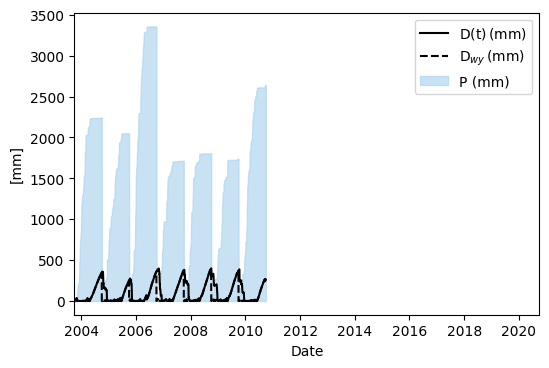

In [83]:
rivendell_short = StudyArea(layers = extract_v1, coords = [39.7273, -123.6433])

rivendell_short.plot(kind = 'timeseries', dpi = 100);

# **Option 2**: Using the waterpyk.gee.extract

### We can also use the waterpyk.gee.extract() function to get timeseries for any number of assets which are specified in the exact same ```layers`` dataframe format!

### Here is an example below that illustrates what happens if you use waterpyk.gee.extract() to extract data from ImageCollections (e.g. prism) AND Images (e.g. MODIS landcover) at the same time. You could also just extract one type or the other.

First we'll get a new dataframe by changing the original rivendell.extracted_df to include just prism, landcover, and elevation.

In [67]:
extract = rivendell.extracted_df.copy() ### the .copy() makes sure we don't change the actual extracted_df attribute ... which I should have prevented in the code ;)
extract['end_date'][0] = '10/1/2022'
rows_to_keep = [0, 4, 5]
extract = extract.iloc[rows_to_keep]
extract.reset_index(drop=True, inplace=True)
extract

,name,asset_id,scale,start_date,end_date,relative_date,bands,new_bandnames,bands_to_scale,scaling_factor,units
0,prism,OREGONSTATE/PRISM/AN81d,500,10/1/03,10/1/2022,NaN,ppt,NaN,NaN,NaN,mm
1,modis_landcover,MODIS/006/MCD12Q1,500,NaN,NaN,most_recent,LC_Type1,landcover,NaN,NaN,NaN
2,srtm_elevation,USGS/SRTMGL1_003,30,NaN,NaN,image,elevation,NaN,NaN,NaN,m


Now we'll use waterpyk.gee.extract() to get those assets from GEE. Notice that for the ```gee_feature``` argument, I used the ```rivendell.gee_feature``` attribute. There is also a waterpyk function that will generate a gee_feature from coordinates if you would rather do it all from scratch.

Also notice how we are returning 2 dataframe from this function: one holds the timeseries (in this case prism) and the other holds the static values for landcover and elevation.

In [64]:
data_timeseries, data_static = waterpyk.gee.extract(layers = extract, gee_feature = rivendell.gee_feature, kind = 'point', combine_ET_bands = False)

Extracting prism
	Original timestep of 1 day(s) was interpolated to daily.
Extracting modis_landcover
	Bands LC_Type1 renamed to landcover.
Extracting srtm_elevation


In [65]:
data_timeseries

,date,asset_name,value,band
0,2003-10-02,prism,0.0,ppt
1,2003-10-03,prism,0.0,ppt
2,2003-10-04,prism,0.0,ppt
3,2003-10-05,prism,0.0,ppt
4,2003-10-06,prism,0.0,ppt
...,...,...,...,...
6934,2022-09-26,prism,0.0,ppt
6935,2022-09-27,prism,0.0,ppt
6936,2022-09-28,prism,0.0,ppt
6937,2022-09-29,prism,0.0,ppt


In [66]:
data_static

,asset_name,value,date,band
0,modis_landcover,1,2020-01-01 00:00:00,landcover
1,srtm_elevation,489,None,elevation
